In [ ]:
# Simple linear regression in Python

In [2]:
# Import the packages and classes you need
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
# Provide data & do appropriate transformations
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) #reshape() on x because x is required to be two-dimensional
y = np.array([5, 20, 14, 32, 22, 38])

In [7]:
# print x, y


In [8]:
# Create a linear regression model
model = LinearRegression()

In [9]:
# fit it using the data
model.fit(x, y)


LinearRegression()

In [14]:
# Get results 
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


In [20]:
# Predict response
y_pred = model.predict(x)
print(y_pred)

[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [ ]:
#y = np.array([5, 20, 14, 32, 22, 38])

In [22]:
y_pred = model.intercept_+model.coef_ *x
print(y_pred) 

[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [24]:
r_sq = model.score(x, y)
print(r_sq)

0.7158756137479542


In [14]:
#Predict price of houses in Boston using machine learning of Linear Regression

# We have some data from previous house sales
# 1050 sq ft, 2 bathroom sold for $100,000
# 450 sq ft, 1 br sold for 40,000
# 2000 sq ft, 3 br sold for 120,000
# 150 sq ft, 1 br sold for $23,000

# How much do you think a house with 1000 square feet and 3 bathrooms will sell for?

In [25]:
# Load the Boston Housing Data set from sklearn.datasets and print it
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [19]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [20]:
# data: contains the information for various houses
# target: prices of the house
# feature_names: names of the features
# DESCR: describes the dataset

In [24]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
# Transfrom the dataset into a data frame
import pandas as pd 
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [30]:
print(df_x,df_y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [27]:
#Get some statistics from the dataset, count, mean
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [54]:
# Initialize the linear regression model
lm = LinearRegression()

In [58]:
# Split the data into 80% training and 20% testing data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=5)

In [66]:
# Train the model with our training data
lm.fit(x_train, y_train)

LinearRegression()

In [67]:
r_sq = lm.score(x_train, y_train)
print(r_sq)

0.738339392059052


In [68]:
# Print the coefficient/weights for each feature/column of the model 
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)

intercept: [37.91248701]
slope: [[-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
  -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
   3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
  -5.94076089e-01]]


In [96]:
# Print the Predictions on our test data
y_pred = lm.predict(x_test)
pred_df = pd.DataFrame(y_pred, columns = ['Predict'])

In [99]:
# Predict values compare with Actual values
pred_df['Actual'] = y_test.values
pred_df

,Predict,Actual
0,37.563118,37.6
1,32.144451,27.9
2,27.065736,22.6
3,5.670806,13.8
4,35.099826,35.2
...,...,...
97,21.912956,26.6
98,22.394774,22.4
99,13.193354,13.1
100,23.969911,23.0


In [95]:
# Check the model performace / accuracy using numpy (MSE (Mean Squared Error))
print(np.mean((y_pred - y_test)**2))

0    20.869292
dtype: float64


In [104]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
212,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74


In [116]:
# New data to predict
print(lm.predict([[1, 80, 5, 0,0.4,3,50,5,4,250,19,400,4.8]]))

[[20.10687365]]


In [40]:
# Now we need to determine which features?
boston_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [ ]:
#The correlation coefficient ranges from -1 to 1. 
#If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
#When it is close to -1, the variables have a strong negative correlation.

In [64]:
#Which features do you choose?

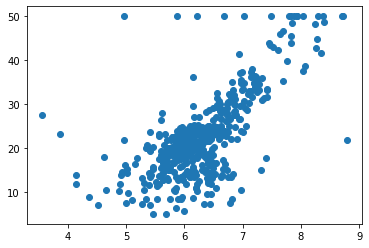

In [84]:
plt.scatter(df_x['RM'],df_y)

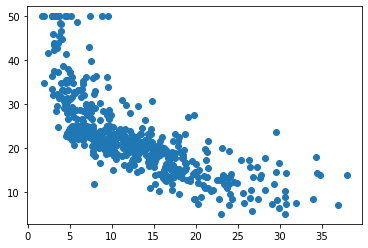

In [85]:
plt.scatter(df_x['LSTAT'],df_y)

In [48]:
# Preparing the data for training the model
# We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.
X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM'])
Y = boston_df['MEDV']